In [262]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pt
import json

In [458]:
import pickle
df = pd.read_pickle("projectData/authorExperienceMatrix.p")
dF = pd.DataFrame(df.items())
dF.columns= ["name", "experience"]
dF[['name','commits']]= pd.DataFrame(dF.name.tolist(), index=dF.index)
experienceCommits = dF

In [459]:
from collections import namedtuple
AuthorCommitTuple = namedtuple('AuthorCommitTuple', ('author', 'commit'))
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', -1)
df = pd.read_pickle("projectData/defectAuthorMatrix.p")
dF = pd.DataFrame(df, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])


In [467]:
implicatedList = dF['implicated'].tolist()
# # dF[['name','commits']]= pd.DataFrame(dF.name.tolist(), index=dF.index)

tempList=[]
commits=experienceCommits['commits'].tolist()
for x in commits:
    if x in implicatedList:
        tempList.append([x, True])
    else:
        tempList.append([x, False])
        

# print(len(tempList))
s=pd.DataFrame(tempList, columns=['commit', 'buggy'])
experienceCommits[['buggy']]=pd.DataFrame(s['buggy'])

experienceCommits
# experienceCommits

experienceCommits['buggy'] = experienceCommits.buggy.astype(int)
# alejandroBuggy = experienceCommits.loc[(experienceCommits['name']=='Alejandro Abdelnur') & (experienceCommits["buggy"]==1)]
# dF.loc[dF['author']=='Mahadev Konar'][['implicated', index=range(40)]
# b= experienceCommits.loc[experienceCommits['name']=='Mahadev Konar']['commits']

# pt.plot(experienceCommits)

# dF.loc[dF['author']=='Mahadev Konar'].count()

author name Alejandro Abdelnur
author name Suresh Srinivas
author name Brandon Li
author name Owen O'Malley
author name Akira Ajisaka
author name Colin Patrick Mccabe
author name Thomas White
author name Todd Lipcon
author name cnauroth
author name Andrew Wang


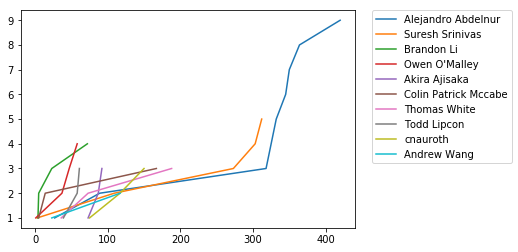

In [586]:
data= dF.groupby('author')['implicated'].nunique()
authorDf = pd.DataFrame(data)
# topBugyContributers= authorDf.implicated.nlargest(10)

tempBuggy=[]
for author in topBugyContributers.index:
    tempBuggy= experienceCommits.loc[(experienceCommits['name']==author) & (experienceCommits["buggy"]==1)]
    tempDf = pd.DataFrame(tempBuggy['buggy'].cumsum())
#     tempBuggy[['cumBuggy']]=0
    tempBuggy[['cumBuggy']]= tempDf
    print("author name", author)
    pt.plot(tempBuggy['experience'], tempBuggy['cumBuggy'], label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    



[ 0.   2.5  5.   7.5 10.  12.5 15.  17.5 20. ] <a list of 9 Text yticklabel objects>


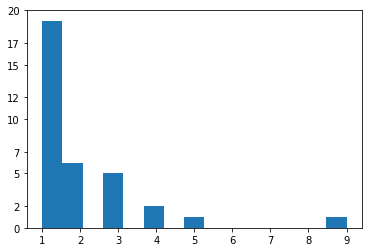

In [585]:
import math
authorDf.implicated.hist(bins=15, grid=False)
locs, label= pt.yticks()
print(locs, label)
yint=[]
for each in locs:
    yint.append(int(each))
pt.yticks(yint)


pt.savefig('histDefects.pdf', bbox_inches="tight")